<a href="https://colab.research.google.com/github/doyoun1355/ABCD-A/blob/20250529/yolov8_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# YOLOv8 설치
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
# 필요한 라이브러리 임포트
import os
from ultralytics import YOLO
import shutil
from google.colab import drive
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# 파일 선택기를 통한 업로드
uploaded = files.upload()

Saving Test.v1i.yolov8.zip to Test.v1i.yolov8.zip


In [4]:
# 코랩 셀에서 ! 를 앞에 붙여서 실행
!mkdir -p /content/dataset
!unzip /content/Test.v1i.yolov8.zip -d /content/dataset

Archive:  /content/Test.v1i.yolov8.zip
  inflating: /content/dataset/README.dataset.txt  
  inflating: /content/dataset/README.roboflow.txt  
  inflating: /content/dataset/data.yaml  
   creating: /content/dataset/train/
   creating: /content/dataset/train/images/
 extracting: /content/dataset/train/images/196-_jpg.rf.71d1434a52ef9de77f75a568deb7ec09.jpg  
 extracting: /content/dataset/train/images/197-_jpg.rf.22a2daad4e06e5a1beee404aff40fd6c.jpg  
 extracting: /content/dataset/train/images/198-_jpg.rf.11a5663838266906f0813ec4d16a56b2.jpg  
 extracting: /content/dataset/train/images/199-_jpg.rf.57feabbf35667c00e5efa98731b66998.jpg  
 extracting: /content/dataset/train/images/200-_jpg.rf.a389fa5acb211efeb8cc7190c87d3c14.jpg  
 extracting: /content/dataset/train/images/201-_jpg.rf.a413ad56974931f5e7e4ef4f435ca4f7.jpg  
 extracting: /content/dataset/train/images/202-_jpg.rf.39fb850482af58357480a94152742a8c.jpg  
 extracting: /content/dataset/train/images/203-_jpg.rf.ca5b1736810944948ff1fc

In [5]:
#test/images 폴더 생성
!mkdir -p /content/dataset/test/images
!cp /content/dataset/train/images/* /content/dataset/test/images/

In [6]:
#valid/images 폴더 생성
!mkdir -p /content/dataset/valid/images
!cp /content/dataset/train/images/* /content/dataset/valid/images/

In [7]:
#valid/labels 폴더 생성
!mkdir -p /content/dataset/valid/labels
!cp /content/dataset/train/labels/* /content/dataset/valid/labels/

In [8]:
# 학습 시작
from ultralytics import YOLO

# Segmentation 모델로 학습
model = YOLO('yolov8l-seg.pt')  # segmentation 모델 사용

results = model.train(
    data='/content/dataset/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='yolov8_seg_custom',
    project='/content/runs/train',
    patience=10,
    save=True,
    device='0'
)

100%|██████████| 88.1M/88.1M [00:00<00:00, 300MB/s]


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_seg_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, 

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

  8                  -1  3   4461568  ultralytics.nn.modules.block.C2f             [512, 512, 3, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   4723712  ultralytics.nn.modules.block.C2f             [1024, 512, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  3   1247744  ultralytics.nn.modules.block.C2f             [768, 256, 3]                 
 16                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256,

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 631.1±275.9 MB/s, size: 21.9 KB)


train: Scanning /content/dataset/train/labels... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 1520.67it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 525.0±282.7 MB/s, size: 22.0 KB)


val: Scanning /content/dataset/valid/labels... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 1300.34it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to /content/runs/train/yolov8_seg_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/train/yolov8_seg_custom
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.2G      1.884      4.741      3.672      1.797        218        640: 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         15        119     0.0119      0.117      0.019     0.0149     0.0065      0.054     0.0136     0.0102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.1G       1.85      4.803      3.603      1.722        210        640: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         15        119     0.0119      0.117       0.02     0.0156    0.00664     0.0574     0.0145     0.0108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.1G      1.859      4.688      3.625      1.817        192        640: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         15        119     0.0118      0.121     0.0203     0.0159    0.00666     0.0608     0.0144     0.0107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.1G      1.766      4.619      3.573      1.769        198        640: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         15        119     0.0118      0.121     0.0216     0.0167    0.00668     0.0608     0.0153     0.0113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.2G      1.821      4.749      3.651      1.736        258        640: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         15        119     0.0116      0.121     0.0223      0.017    0.00658     0.0608     0.0157     0.0116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.1G      1.703      4.952      3.582      1.725        200        640: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         15        119     0.0114      0.121     0.0223     0.0169    0.00662     0.0642      0.016     0.0116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.2G      1.662      4.656      3.646      1.584        234        640: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         15        119     0.0116      0.121     0.0228     0.0186    0.00674     0.0642     0.0165     0.0128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.1G      1.803       5.12      3.626      1.702        202        640: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         15        119     0.0126      0.121     0.0233     0.0192    0.00709     0.0608     0.0169     0.0131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.1G      1.864      5.228      3.635      1.805        222        640: 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         15        119      0.604      0.314      0.384      0.209      0.594      0.272      0.332      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.5G      1.178      2.799      2.291      1.392        211        640: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         15        119       0.82      0.462      0.564      0.387      0.796      0.438      0.537      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.6G     0.9618      2.003      2.407      1.228        221        640: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         15        119      0.591      0.682      0.688      0.491      0.589      0.692      0.668      0.403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.4G     0.9817      1.865      1.654       1.22        167        640: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         15        119      0.861      0.609      0.745      0.483      0.875      0.612      0.734      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.4G     0.8509      1.428      1.524      1.206        156        640: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         15        119       0.71      0.775      0.853      0.578      0.681      0.809      0.837        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.4G      0.775      1.383       1.29      1.151        140        640: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         15        119      0.817      0.888      0.932      0.639      0.857      0.857      0.922      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.5G      0.855      1.537      1.234      1.169        173        640: 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         15        119      0.798      0.807      0.796      0.571      0.798      0.813      0.793      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.6G     0.7908       1.01     0.9172      1.069        258        640: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         15        119      0.816      0.826      0.836       0.58      0.806      0.816      0.843       0.47



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.5G      0.782        1.1      1.163       1.12        196        640: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         15        119      0.804      0.823      0.919      0.653      0.793      0.764      0.876      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.4G     0.7707       1.12     0.9057      1.085        177        640: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         15        119      0.804      0.823      0.919      0.653      0.793      0.764      0.876      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.6G     0.8164      1.048      1.097      1.066        181        640: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         15        119       0.73      0.821      0.895      0.687       0.67      0.786      0.818       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.5G     0.7784     0.8523      1.113      1.066        170        640: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         15        119       0.73      0.821      0.895      0.687       0.67      0.786      0.818       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.7G     0.7635      0.969      1.135      1.059        206        640: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         15        119      0.861      0.921      0.959      0.737       0.83      0.883      0.919      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.6G     0.7626     0.9199     0.8391      1.076        211        640: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         15        119      0.861      0.921      0.959      0.737       0.83      0.883      0.919      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.7G     0.7144     0.9911     0.9378      1.033        231        640: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         15        119      0.909      0.927      0.964      0.739      0.901       0.92      0.947      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.4G     0.6477     0.8321     0.8398      1.061        188        640: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         15        119      0.909      0.927      0.964      0.739      0.901       0.92      0.947      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.8G     0.6389     0.7365     0.8127      1.007        237        640: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         15        119      0.723      0.859      0.847      0.635       0.73      0.866      0.853      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.5G     0.7173     0.9168     0.8147      1.073        194        640: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         15        119      0.723      0.859      0.847      0.635       0.73      0.866      0.853      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.6G     0.6879     0.8398     0.7789      1.019        190        640: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         15        119      0.835      0.924      0.934      0.721      0.828      0.916      0.911       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.6G     0.6783     0.7428     0.7576      1.003        222        640: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         15        119      0.835      0.924      0.934      0.721      0.828      0.916      0.911       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.7G     0.7175     0.8732     0.7652      1.024        229        640: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         15        119      0.852      0.923      0.974      0.761      0.847       0.92      0.957      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.5G     0.6836      1.037     0.8164     0.9944        172        640: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         15        119      0.852      0.923      0.974      0.761      0.847       0.92      0.957      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.7G     0.6542     0.8606     0.7695      1.016        190        640: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         15        119       0.83      0.926       0.97      0.738      0.806      0.897      0.919      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.5G     0.6577       0.79     0.7178      1.025        194        640: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         15        119       0.83      0.926       0.97      0.738      0.806      0.897      0.919      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.7G     0.6758     0.9409      0.711      1.045        194        640: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         15        119      0.755      0.948      0.971      0.741      0.747      0.926      0.935      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.5G     0.6529     0.9374     0.7452      1.012        187        640: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         15        119      0.755      0.948      0.971      0.741      0.747      0.926      0.935      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.7G     0.6447     0.8011     0.7109     0.9992        203        640: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         15        119      0.746       0.96      0.957      0.745      0.735      0.949      0.937      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.5G     0.6562     0.7593     0.7563      0.981        218        640: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         15        119      0.746       0.96      0.957      0.745      0.735      0.949      0.937      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.5G     0.5961     0.7209     0.7562     0.9622        167        640: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         15        119       0.85       0.93      0.984      0.786      0.838       0.92      0.965      0.705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.5G     0.6614     0.7879     0.7373      1.025        188        640: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         15        119       0.85       0.93      0.984      0.786      0.838       0.92      0.965      0.705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.7G     0.5671     0.7312     0.6782     0.9573        190        640: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         15        119      0.874      0.924      0.988      0.797      0.869      0.921      0.969      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.5G     0.6349     0.6779     0.6769      1.017        210        640: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         15        119      0.874      0.924      0.988      0.797      0.869      0.921      0.969      0.712


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.5G     0.5735     0.5021     0.6493      1.013        117        640: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         15        119      0.885      0.927      0.992      0.805      0.883      0.923      0.973      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.3G     0.5734     0.5692     0.5949     0.9721        119        640: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         15        119      0.885      0.927      0.992      0.805      0.883      0.923      0.973      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.5G     0.6348     0.6392     0.6644      1.063        115        640: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         15        119      0.834       0.97       0.99      0.791       0.83      0.967       0.97      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.4G     0.5859     0.5502     0.5988       1.02        118        640: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         15        119      0.834       0.97       0.99      0.791       0.83      0.967       0.97      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.5G      0.527     0.5509     0.5997     0.9585        116        640: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         15        119      0.845      0.982      0.992      0.821      0.854      0.963      0.971      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.3G      0.545     0.5715     0.5636     0.9466        119        640: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         15        119      0.845      0.982      0.992      0.821      0.854      0.963      0.971      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.5G     0.5622      0.588     0.5887     0.9968        116        640: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         15        119      0.922      0.909      0.989      0.825      0.917      0.906      0.967      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.3G     0.4693     0.4723      0.535     0.9266        117        640: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         15        119      0.922      0.909      0.989      0.825      0.917      0.906      0.967      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.5G     0.5786     0.5503     0.5773      1.029        116        640: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         15        119      0.939      0.938      0.992       0.83      0.934      0.934       0.97      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.4G     0.5107      0.502     0.5417     0.9706        117        640: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         15        119      0.939      0.938      0.992       0.83      0.934      0.934       0.97      0.701



50 epochs completed in 0.065 hours.
Optimizer stripped from /content/runs/train/yolov8_seg_custom/weights/last.pt, 92.3MB
Optimizer stripped from /content/runs/train/yolov8_seg_custom/weights/best.pt, 92.3MB

Validating /content/runs/train/yolov8_seg_custom/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l-seg summary (fused): 125 layers, 45,915,743 parameters, 0 gradients, 220.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


                   all         15        119      0.939      0.938      0.992      0.829      0.934      0.934       0.97        0.7
           dotted-line         15         59          1       0.77      0.994       0.83      0.978      0.753      0.885      0.517
             left-lane         15         15          1      0.961      0.995      0.834          1      0.961      0.995       0.85
             left-line         15         15      0.931          1      0.995      0.746       0.93          1      0.995      0.563
            right-lane         15         15      0.878      0.958       0.98      0.775      0.878      0.958       0.98      0.774
            right-line         15         15      0.886          1      0.995      0.962      0.885          1      0.995      0.797
Speed: 0.2ms preprocess, 21.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/runs/train/yolov8_seg_custom


In [9]:
# 학습된 모델 로드(폴더에 맞도록)
model = YOLO('/content/runs/train/yolov8_seg_custom/weights/best.pt')

# 테스트 실행
results = model.predict(
    source='/content/dataset/test/images',  # 테스트 이미지 경로
    save=True,                              # 결과 저장
    save_txt=True,                          # 텍스트 결과도 저장
    conf=0.5,                               # 신뢰도 임계값
    project='/content/runs/detect',         # 저장 프로젝트 경로
    name='test_results'                     # 폴더 이름 지정
)


image 1/15 /content/dataset/test/images/196-_jpg.rf.71d1434a52ef9de77f75a568deb7ec09.jpg: 640x640 3 dotted-lines, 1 left-lane, 2 left-lines, 2 right-lanes, 3 right-lines, 76.1ms
image 2/15 /content/dataset/test/images/197-_jpg.rf.22a2daad4e06e5a1beee404aff40fd6c.jpg: 640x640 3 dotted-lines, 1 left-lane, 1 left-line, 1 right-lane, 1 right-line, 42.6ms
image 3/15 /content/dataset/test/images/198-_jpg.rf.11a5663838266906f0813ec4d16a56b2.jpg: 640x640 3 dotted-lines, 1 left-lane, 1 left-line, 2 right-lanes, 2 right-lines, 43.2ms
image 4/15 /content/dataset/test/images/199-_jpg.rf.57feabbf35667c00e5efa98731b66998.jpg: 640x640 3 dotted-lines, 1 left-lane, 1 left-line, 1 right-lane, 1 right-line, 42.9ms
image 5/15 /content/dataset/test/images/200-_jpg.rf.a389fa5acb211efeb8cc7190c87d3c14.jpg: 640x640 3 dotted-lines, 1 left-lane, 2 left-lines, 1 right-lane, 1 right-line, 38.6ms
image 6/15 /content/dataset/test/images/201-_jpg.rf.a413ad56974931f5e7e4ef4f435ca4f7.jpg: 640x640 4 dotted-lines, 1 le

In [10]:
import cv2

def draw_enhanced_results(image_path, results):
    """세그멘테이션 마스크를 이미지 위에 시각화"""
    # 이미지 로드
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 클래스 색상 정의
    class_names = ['dotted-line', 'left_lane', 'left_line', 'right_lane', 'right_line']
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)]

    for result in results:
        masks = result.masks  # 마스크 객체

        if masks is not None and masks.data is not None:
            mask_data = masks.data.cpu().numpy()  # (N, H, W)
            cls_list = result.boxes.cls.cpu().numpy().astype(int)  # 클래스 인덱스 리스트
            conf_list = result.boxes.conf.cpu().numpy()  # 신뢰도

            for i in range(len(mask_data)):
                mask = mask_data[i]
                cls_id = cls_list[i]
                conf = conf_list[i]

                # 마스크 색상 및 클래스 이름
                color = colors[cls_id % len(colors)]
                class_name = class_names[cls_id] if cls_id < len(class_names) else f'class_{cls_id}'
                label = f'{class_name}: {conf:.2f}'

                # 마스크를 컬러로 적용
                colored_mask = np.zeros_like(img_rgb, dtype=np.uint8)
                for c in range(3):
                    colored_mask[:, :, c] = mask * color[c]

                # 반투명하게 overlay
                img_rgb = cv2.addWeighted(img_rgb, 1.0, colored_mask, 0.4, 0)

                # 마스크 경계 추출하여 텍스트 위치 추정
                contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                if contours:
                    x, y, w, h = cv2.boundingRect(contours[0])
                    # 라벨 텍스트
                    (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
                    cv2.rectangle(img_rgb, (x, y - text_height - 10), (x + text_width, y), color, -1)
                    cv2.putText(img_rgb, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    return img_rgb


Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


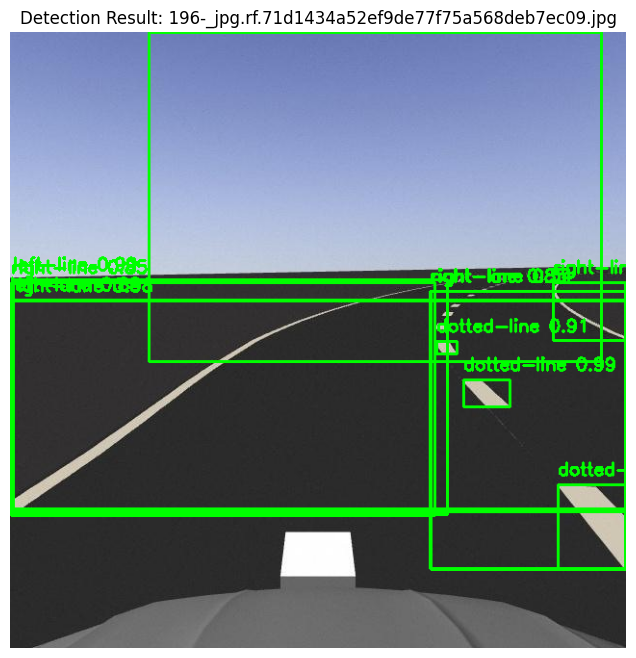

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


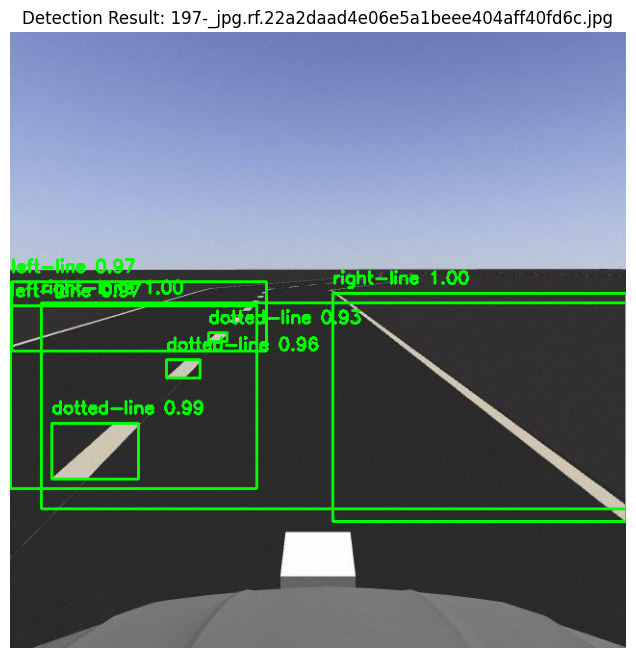

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


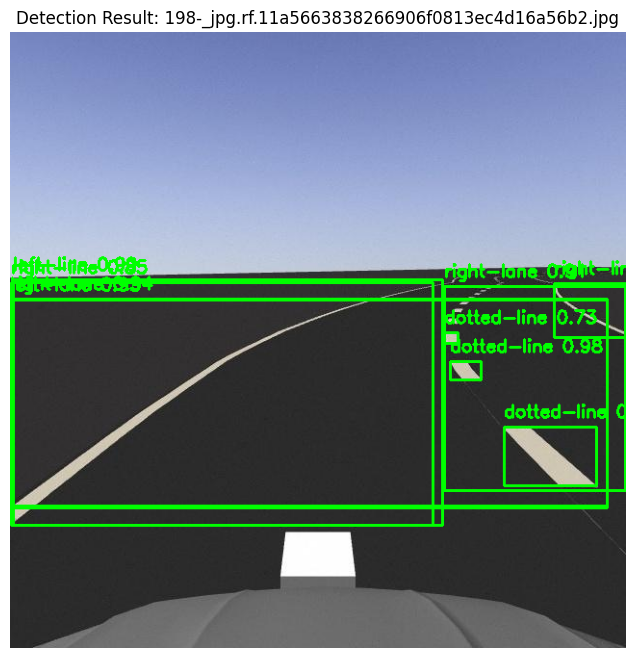

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


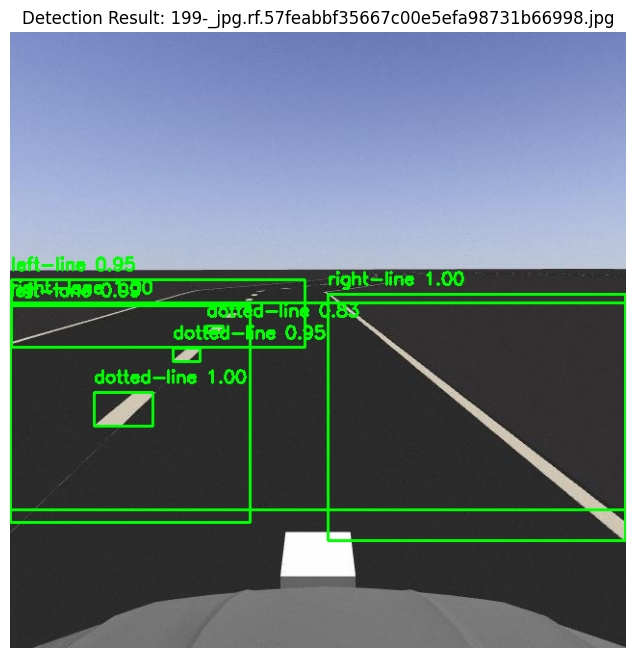

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


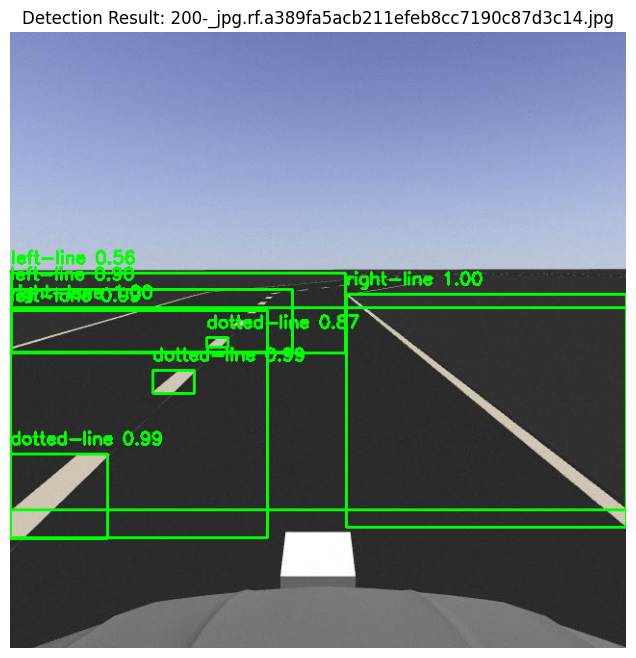

In [11]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

# test_images 정의
test_images_dir = '/content/dataset/test/images'
test_images = sorted(os.listdir(test_images_dir))

# draw_enhanced_results 함수 정의
def draw_enhanced_results(img_path, result):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    boxes = result[0].boxes.xyxy.cpu().numpy()
    scores = result[0].boxes.conf.cpu().numpy()
    classes = result[0].boxes.cls.cpu().numpy().astype(int)
    class_names = result[0].names

    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = map(int, box)
        label = f"{class_names[cls]} {score:.2f}"
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    return img

# 이미지별 예측 및 시각화
for i, img_name in enumerate(test_images[:5]):
    img_path = os.path.join(test_images_dir, img_name)

    result = model.predict(img_path, conf=0.5, verbose=False)

    enhanced_img = draw_enhanced_results(img_path, result)

    plt.figure(figsize=(12, 8))
    plt.imshow(enhanced_img)
    plt.title(f'Detection Result: {img_name}')
    plt.axis('off')
    plt.show()



In [16]:
#동영상으로 만들기

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# YOLO 예측 + 시각화 함수 (콜라보용)
image_dir = '/content/dataset/test/images/'
test_images = sorted([img for img in os.listdir(image_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])

frames = []

for i, img_name in enumerate(test_images[:5]):  # 처음 5개만
    img_path = os.path.join(image_dir, img_name)

    # 예측 실행
    result = model.predict(img_path, conf=0.5, verbose=False)

    # 향상된 시각화
    enhanced_img = draw_enhanced_results(img_path, result)

    # RGB -> BGR (OpenCV용)
    bgr_img = cv2.cvtColor(np.array(enhanced_img), cv2.COLOR_RGB2BGR)

    # 모든 프레임 사이즈를 동일하게 유지
    bgr_img = cv2.resize(bgr_img, (1280, 720))

    frames.append(bgr_img)

# 🔄 동영상 생성
video_path = "/content/detection_results.mp4"
fps = 2  # 0.5초 간격 = 2프레임/초
height, width, _ = frames[0].shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 코덱 설정

out = cv2.VideoWriter(video_path, fourcc, fps, (width, height))

for frame in frames:
    out.write(frame)

out.release()
print(f"✅ 영상 저장 완료: {video_path}")

# Colab에서 다운로드 링크 제공
from google.colab import files
files.download(video_path)

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels
✅ 영상 저장 완료: /content/detection_results.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>